In [1]:
# xml 파일 파싱을 위해 패키지 첨부
import xml.etree.ElementTree as et 

import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations

import warnings
warnings.filterwarnings(action='ignore')
# scale 전처리를 위한 패키지 첨부  
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:

# # 데이터 조작을 위해 패키지 첨부
# import pandas as pd

# import numpy as np
# import re




# 1. 데이터 호출 
#### . Posts.xml : ai.stackexchange 질문-답변 데이터
#### . Users.xml : ai.stackexchange 유저정보
#### . https://meta.stackexchange.com/questions/2677/database-schema-documentation-for-the-public-data-dump-and-sede/2678#2678

In [3]:
xtree = et.parse("./ai.stackexchange.com/Posts.xml")
xroot = xtree.getroot()

In [4]:
arr=[]
# xml의 node를 대상으로
for node in xroot: 
    # 노드의 key 값을 arr리스트에 붙여넣기     
    arr.extend(list(node.attrib.keys()))
# 중복을 제거하여 xml의 컬럼 정보를 arr 배열에 저장
arr = list(set(arr))

In [5]:
df = pd.DataFrame()
tot_arr = []
# xml의 node를 대상으로
for node in xroot: 
    # 이전 셀에서 만든 컬럼정보를 기반으로 데이터프레임의 한 행을 tmp_arr에 저장     
    tmp_arr = [node.attrib.get(column) if node is not np.NaN else None for column in arr]
    # tmp_arr을 tot_arr에 append
    tot_arr.append(tmp_arr)

In [6]:
post_df = pd.DataFrame(tot_arr, columns =arr)

In [7]:
post_df.head()

,CommentCount,ClosedDate,Score,Title,ParentId,OwnerUserId,ViewCount,LastEditorDisplayName,PostTypeId,ContentLicense,...,LastEditorUserId,AcceptedAnswerId,CreationDate,Id,CommunityOwnedDate,LastEditDate,OwnerDisplayName,Body,Tags,LastActivityDate
0,0,None,11,"What is ""backprop""?",None,8,801,None,1,CC BY-SA 4.0,...,2444,3,2016-08-02T15:39:14.947,1,None,2019-11-16T17:56:22.093,None,"<p>What does ""backprop"" mean? Is the ""backprop...",<neural-networks><backpropagation><terminology...,2021-07-08T10:45:23.250
1,0,None,14,How does noise affect generalization?,None,8,1153,None,1,CC BY-SA 4.0,...,2444,9,2016-08-02T15:40:20.623,2,None,2019-02-23T22:36:19.090,None,<p>Does increasing the noise in data help to i...,<neural-networks><machine-learning><statistica...,2019-02-23T22:36:37.133
2,0,None,15,None,1,4,None,None,2,CC BY-SA 3.0,...,None,None,2016-08-02T15:40:24.820,3,None,None,None,"<p>""Backprop"" is the same as ""backpropagation""...",None,2016-08-02T15:40:24.820
3,0,None,33,How to find the optimal number of neurons per ...,None,8,1399,None,1,CC BY-SA 3.0,...,2444,12,2016-08-02T15:41:22.020,4,None,2021-01-19T23:54:07.813,None,"<p>When you're writing your algorithm, how do ...",<neural-networks><hyperparameter-optimization>...,2021-01-19T23:54:07.813
4,0,None,7,Are humans intelligent according to the defini...,None,29,299,None,1,CC BY-SA 4.0,...,2444,20,2016-08-02T15:43:35.460,6,None,2019-06-15T18:25:58.513,None,<p>Given the following definition of an intell...,<philosophy><definitions><intelligent-agent>,2019-06-15T18:29:55.520


In [8]:
utree = et.parse("./ai.stackexchange.com/Users.xml")
uroot = utree.getroot()

In [9]:
arr=[]
# xml의 node를 대상으로
for node in uroot: 
    # 노드의 key 값을 arr리스트에 붙여넣기     
    arr.extend(list(node.attrib.keys()))
# 중복을 제거하여 xml의 컬럼 정보를 arr 배열에 저장
arr = list(set(arr))

In [10]:
df = pd.DataFrame()
tot_arr = []
# xml의 node를 대상으로
for node in uroot: 
    # 이전 셀에서 만든 컬럼정보를 기반으로 데이터프레임의 한 행을 tmp_arr에 저장     
    tmp_arr = [node.attrib.get(column) if node is not np.NaN else None for column in arr]
    # tmp_arr을 tot_arr에 append
    tot_arr.append(tmp_arr)

In [11]:
user_df = pd.DataFrame(tot_arr, columns =arr)

In [12]:
user_df.head()

,WebsiteUrl,AccountId,Location,UpVotes,Reputation,CreationDate,Id,DisplayName,AboutMe,Views,DownVotes,LastAccessDate
0,None,-1,on the server farm,1487,1,2016-08-02T00:14:10.580,-1,Community,"<p>Hi, I'm not really a person.</p>\r\n<p>I'm ...",180,1929,2016-08-02T00:14:10.580
1,None,37099,"New York, NY",0,101,2016-08-02T15:36:45.333,1,Adam Lear,\n<p>Developer at Stack Overflow focusing on p...,203,0,2023-06-12T20:36:30.110
2,https://nickcraver.com/blog/,7598,"Winston-Salem, NC",0,101,2016-08-02T15:36:48.397,2,Nick Craver,<p>I am a Principal Software Engineer at Micro...,11,0,2016-11-30T22:09:22.300
3,http://stackoverflow.com,2,"Corvallis, OR, United States",0,101,2016-08-02T15:38:01.633,3,Geoff Dalgas,<p>Dev #2 who helped create Stack Overflow cur...,12,0,2018-01-09T03:22:26.573
4,http://www.francky.me,169656,None,26,2626,2016-08-02T15:38:21.100,4,Franck Dernoncourt,"<p><a href=""https://stackexchange.com/users/16...",176,5,2023-08-27T20:03:30.780


# 2. 데이터 결측치/이상치 확인 
#### . 결측치 : OwnerUserId에 결측치 확인 
#### . 이상치 : OwnerUserId에 user_df 데이터셋에 등록되지 않은 아이디가 존재하는지 확인

In [13]:
# 분석하기 전 OwnerUserID null 인것은 제외
del_idx = post_df[post_df['OwnerUserId'].isna()].index

In [14]:
del_idx

Int64Index([  184,   244,   245,   497,   592,   689,   722,   900,  1042,
             1179,
            ...
            22859, 23677, 23787, 24827, 25010, 25011, 25013, 25015, 25173,
            25274],
           dtype='int64', length=436)

In [15]:
post_df.loc[del_idx, 'PostTypeId'].value_counts()
# PostTypeId이 3인 경우 질문, 2인 경우 답변 

1    169
2    142
4     65
5     60
Name: PostTypeId, dtype: int64

In [16]:
post_df.drop(del_idx, inplace=True)

In [17]:
# 분석하기 전 OwnerUserID 가 user_df에 등록되지 않은 경우 이상치로 간주하고 제거 
post_df.loc[~post_df['OwnerUserId'].isin(user_df['AccountId']),'OwnerUserId']

0            8
1            8
2            4
3            8
4           29
         ...  
25291    75234
25292    75792
25293     1931
25294    74581
25295    63793
Name: OwnerUserId, Length: 24274, dtype: object

In [18]:
user_df[user_df['AccountId'].isin([8])]
# 근데 url로 입력해서 들어가면 정보가 있다...?
# https://ai.stackexchange.com/users/8/kenorb

,WebsiteUrl,AccountId,Location,UpVotes,Reputation,CreationDate,Id,DisplayName,AboutMe,Views,DownVotes,LastAccessDate


In [19]:
post_df.loc[~post_df['OwnerUserId'].isin(user_df['Id']),'OwnerUserId']
# 모두다 등록되어있음 

Series([], Name: OwnerUserId, dtype: object)

In [20]:
user_df[user_df['Id'].isin(['8'])]

,WebsiteUrl,AccountId,Location,UpVotes,Reputation,CreationDate,Id,DisplayName,AboutMe,Views,DownVotes,LastAccessDate
8,https://github.com/EA31337,22370,"London, UK",586,10423,2016-08-02T15:38:36.723,8,kenorb,"<p>I'm a DevOps guy, also IT engineer programm...",580,3,2023-05-02T20:47:36.570


In [21]:
cond1 = post_df['OwnerUserId'].isin(['8'])
cond2 = post_df['PostTypeId']== '2'
post_df.loc[cond1&cond2, 'Id'].head(1)

29    33
Name: Id, dtype: object

https://ai.stackexchange.com/questions/33

# 3. 데이터 전처리 
#### . 질문자ID-답변자ID를 한 행에 오도록 데이터 병합 
#### . 2020년 9월 2일부터의 데이터 사용

In [22]:
# 데이터 셋 중 답변만 추출 
answer_df = post_df[post_df['PostTypeId']=='2']

In [23]:
# answer_df와 기존의 데이터셋을 ParentId 기준으로 merge
merge_df = pd.merge(answer_df, post_df[['Id', 'Score', 'Title', 'OwnerUserId', 'CreationDate', 'ViewCount']], left_on = 'ParentId', right_on = 'Id', suffixes=['', '_question'])

In [24]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11288 entries, 0 to 11287
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CommentCount           11288 non-null  object
 1   ClosedDate             0 non-null      object
 2   Score                  11288 non-null  object
 3   Title                  0 non-null      object
 4   ParentId               11288 non-null  object
 5   OwnerUserId            11288 non-null  object
 6   ViewCount              0 non-null      object
 7   LastEditorDisplayName  26 non-null     object
 8   PostTypeId             11288 non-null  object
 9   ContentLicense         11288 non-null  object
 10  AnswerCount            0 non-null      object
 11  FavoriteCount          0 non-null      object
 12  LastEditorUserId       4658 non-null   object
 13  AcceptedAnswerId       0 non-null      object
 14  CreationDate           11288 non-null  object
 15  Id                 

In [25]:
# 데이터 분할 기준일자 세팅
dt = datetime.date(2021,9,2)

In [26]:
merge_df = merge_df[pd.to_datetime(merge_df['CreationDate_question']).dt.date > dt]

In [27]:
print(merge_df['CreationDate_question'].min())
print(merge_df['CreationDate_question'].max())

2021-09-03T07:38:22.440
2023-09-01T12:01:44.753


In [28]:
print(merge_df['CreationDate'].min())
print(merge_df['CreationDate'].max())

2021-09-03T09:22:47.470
2023-09-02T17:46:22.243


In [29]:
merge_df[['OwnerUserId', 'OwnerUserId_question', 'Id_question']].isna().sum()

OwnerUserId             0
OwnerUserId_question    0
Id_question             0
dtype: int64

# 3. 데이터 시각화
#### . Research Question에서 정의한 Observer, Student, Guru가 존재하는지 시각화 

#### . Oberser 확인을 위해 Q&A 포스트의 ViewCount 시각화

In [30]:
viewcount_df = merge_df[['ParentId', 'ViewCount_question', 'CreationDate_question']].drop_duplicates()

In [31]:
viewcount_df['ViewCount_question'] = viewcount_df['ViewCount_question'].astype('int')

In [32]:
viewcount_df['question_year'] = pd.to_datetime(viewcount_df['CreationDate_question']).dt.year

In [33]:
viewcount_df.head()

,ParentId,ViewCount_question,CreationDate_question,question_year
8751,31526,266,2021-09-03T07:38:22.440,2021
8753,31536,683,2021-09-04T04:44:31.433,2021
8756,31535,1168,2021-09-04T02:10:11.173,2021
8757,31534,145,2021-09-04T00:44:43.523,2021
8760,31529,882,2021-09-03T16:55:24.417,2021


In [34]:
viewcount_df = viewcount_df.groupby(['question_year']).mean()[['ViewCount_question']].reset_index()

In [35]:
decrease_2122 = np.round(viewcount_df['ViewCount_question'].pct_change()[1]*100, 2)
decrease_2223 = np.round(viewcount_df['ViewCount_question'].pct_change()[2]*100, 2)

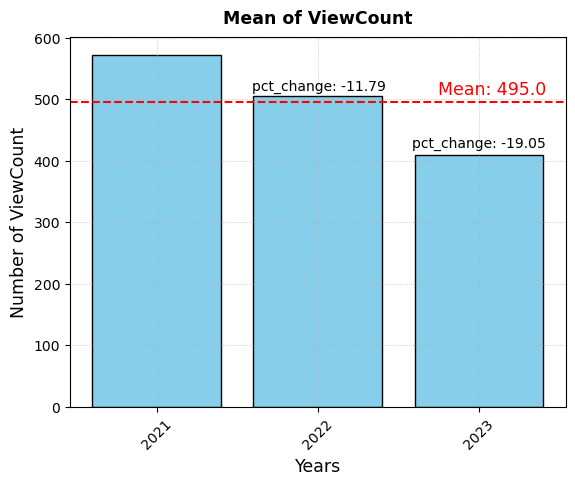

In [36]:
fig, ax = plt.subplots()

ax.bar(viewcount_df.index
    ,  height = viewcount_df['ViewCount_question']
    ,  color = 'skyblue'
    ,  edgecolor = 'black'
      ) # hist type

ax.set_title("Mean of ViewCount", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Years", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Number of ViewCount", # add y-axis label
              fontsize = 12.5)

label_list = list(viewcount_df['question_year'])
tick_values = np.arange(len(label_list))
ax.set_xticks(ticks = tick_values ,labels = label_list, rotation =45)

ax.axhline(np.mean(viewcount_df['ViewCount_question']), # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

fig.text(0.7, 0.76, color = 'red', fontsize = 12.5,  s='Mean: ' + str(round(np.mean(viewcount_df['ViewCount_question']), 2))) #
fig.text(0.41, 0.77, s='pct_change: ' + str(decrease_2122)) #
fig.text(0.66, 0.65, s='pct_change: ' + str(decrease_2223)) #

ax.grid(True, linestyle = ':', linewidth = 0.5) # add grid

plt.show();

#### . Oberver 대비 Student, Guru 확인을 위해 Post 별 Answer 빈도수 시각화 

In [37]:
answer_count = merge_df.groupby(['Id_question']).count()[['Id']].reset_index()

In [38]:
user_count = merge_df.groupby(['Id_question']).count()[['OwnerUserId']].reset_index()

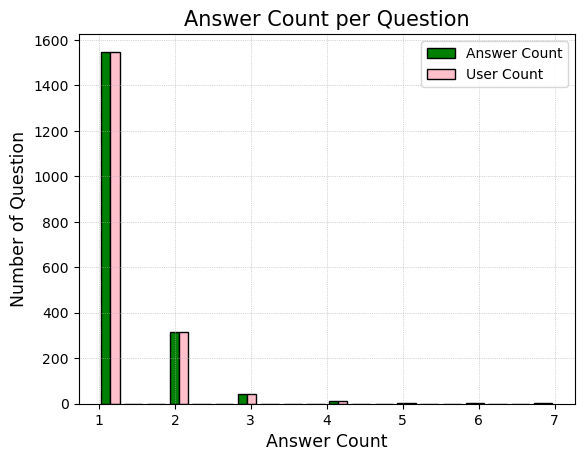

In [39]:
### two groups: default

fig, ax = plt.subplots()

ax.hist([answer_count['Id'], user_count['OwnerUserId']], # specify data
        bins = 20, # number of bins
        color = ['green', 'pink'], # bar color
        edgecolor = 'black', # bar edge color
        histtype = 'bar', # type of histogram
        label = ['Answer Count', 'User Count']) # create legened labels

ax.set_title('Answer Count per Question', fontsize = 15) # title
ax.set_xlabel('Answer Count', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of Question', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10, ncols = 1) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

#### . Student, Guru의 활동을 확인하기 위해 유저별 Answer count와 Question Count 확인

In [40]:
a_df = merge_df[['OwnerUserId','Id_question']].drop_duplicates()

In [41]:
q_df = merge_df[['OwnerUserId_question', 'Id_question']].drop_duplicates()
q_df.columns = ['OwnerUserId','Id_question']

In [42]:
a_df['type']= 'answer'
q_df['type'] = 'question'

In [43]:
q_and_a_df = pd.concat([a_df, q_df], axis = 0)

In [44]:
q_and_a_df

,OwnerUserId,Id_question,type
8751,38846,31526,answer
8752,28048,31526,answer
8753,17302,31536,answer
8754,47080,31536,answer
8755,72984,31536,answer
...,...,...,...
11282,75700,41933,question
11283,75635,41915,question
11284,75376,41823,question
11285,51949,41953,question


In [45]:
q_and_a_df.sort_values(by = ['Id_question', 'type'], ascending=[True, False]).head(20)

,OwnerUserId,Id_question,type
8751,18758,31526,question
8751,38846,31526,answer
8752,28048,31526,answer
8760,49593,31529,question
8760,38846,31529,answer
8761,28048,31529,answer
8757,49602,31534,question
8757,47080,31534,answer
8756,32750,31535,question
8756,47080,31535,answer


In [46]:
q_and_a_gb = q_and_a_df.groupby(['OwnerUserId', 'type']).count().reset_index()

In [47]:
q_and_a_pv = pd.pivot_table(q_and_a_gb, index = 'OwnerUserId', columns = 'type', values = 'Id_question', aggfunc = [sum], fill_value = 0).reset_index()

In [48]:
q_and_a_gb

,OwnerUserId,type,Id_question
0,10051,answer,1
1,10191,question,1
2,104,question,3
3,10592,answer,1
4,10649,answer,1
...,...,...,...
2003,9608,answer,5
2004,97,answer,1
2005,9838,answer,1
2006,9863,answer,1


In [49]:
q_and_a_pv[q_and_a_pv['OwnerUserId']== '9863']

OwnerUserId    sum         
type             answer question
1825        9863      1        0

In [50]:
q_and_a_pv.columns = ['UserId', 'answer_cnt', 'question_cnt']

In [51]:
q_and_a_pv.sort_values(by = ['question_cnt'], ascending=False)

,UserId,answer_cnt,question_cnt
66,18758,0,83
713,52800,0,22
177,31755,2,18
389,45724,2,13
114,25362,3,13
...,...,...,...
948,55998,1,0
950,56009,1,0
951,56010,1,0
955,56121,1,0


In [52]:
q_and_a_pv['tot_cnt'] = q_and_a_pv[['answer_cnt', 'question_cnt']].sum(axis = 1)

In [53]:
q_and_a_pv['answer_rate'] = np.round(q_and_a_pv['answer_cnt'].div( q_and_a_pv['tot_cnt'])*100, 2)

In [54]:
q_and_a_pv

,UserId,answer_cnt,question_cnt,tot_cnt,answer_rate
0,10051,1,0,1,100.0
1,10191,0,1,1,0.0
2,104,0,3,3,0.0
3,10592,1,0,1,100.0
4,10649,1,0,1,100.0
...,...,...,...,...,...
1822,9608,5,0,5,100.0
1823,97,1,0,1,100.0
1824,9838,1,0,1,100.0
1825,9863,1,0,1,100.0


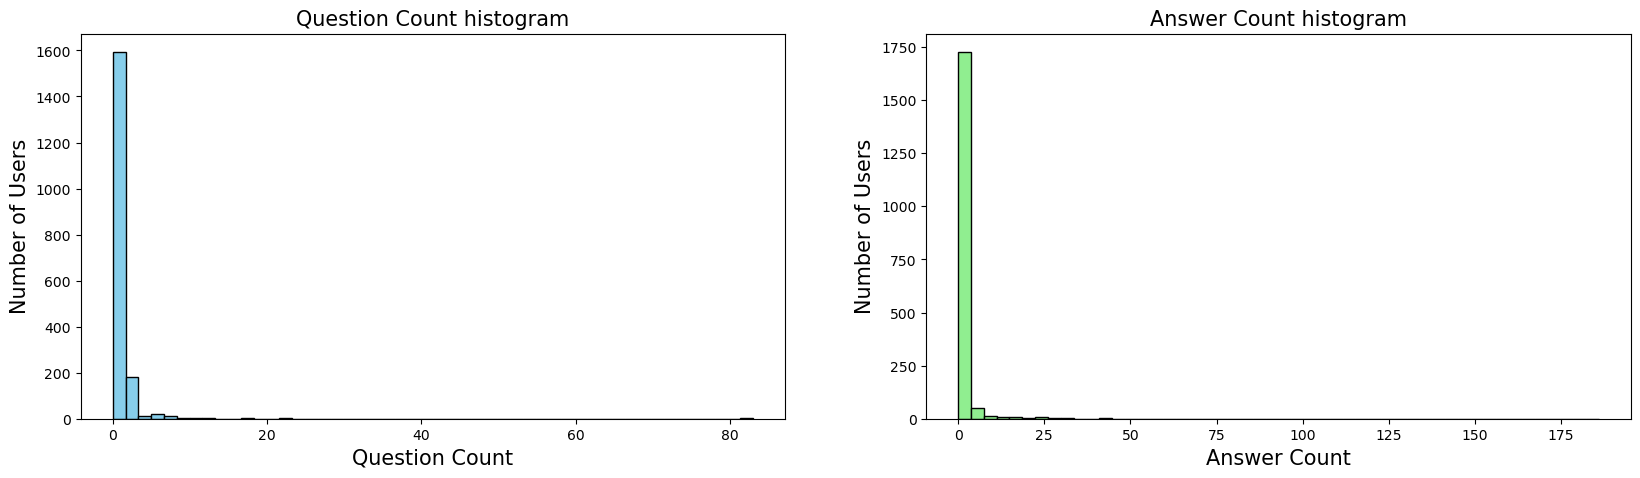

In [55]:
### create a figure with multiple subplots

fig, axs = plt.subplots(1, 2, figsize = (20, 5))

axs[0].hist(q_and_a_pv['question_cnt'], # plot the original histogram
            bins = 50,
            color = 'skyblue',
            edgecolor = 'black')
axs[0].set_title('Question Count histogram', fontsize = 15)
axs[0].set_xlabel('Question Count', fontsize = 15)
axs[0].set_ylabel('Number of Users', fontsize = 15)

# log_transformed_populations = np.log(city_populations) # apply log transformation to data and plot
axs[1].hist(q_and_a_pv['answer_cnt'],
            bins = 50,
            color = 'lightgreen',
            edgecolor = 'black')
axs[1].set_title('Answer Count histogram', fontsize = 15)
axs[1].set_xlabel('Answer Count', fontsize = 15)
axs[1].set_ylabel('Number of Users', fontsize = 15)



plt.show();

In [56]:
mm = MinMaxScaler()
q_and_a_pv['answer_cnt_scaled'] = mm.fit_transform(q_and_a_pv[['answer_cnt']])

In [57]:
mm = MinMaxScaler()
q_and_a_pv['question_cnt_scaled'] = mm.fit_transform(q_and_a_pv[['question_cnt']])

In [58]:
mm = MinMaxScaler()
q_and_a_pv['tot_cnt_scaled'] = mm.fit_transform(q_and_a_pv[['tot_cnt']])

In [59]:
q_and_a_pv['answer_cnt_scaled_rate']  = ((q_and_a_pv['answer_cnt_scaled']*q_and_a_pv['answer_cnt'])/q_and_a_pv['tot_cnt'])*100

In [60]:
q_and_a_pv['answer_cnt_scaled_rate'] = np.where(q_and_a_pv['answer_cnt_scaled_rate'] == np.inf, 0, q_and_a_pv['answer_cnt_scaled_rate'])

In [61]:
print(q_and_a_pv['answer_cnt_scaled_rate'].min())
print(q_and_a_pv['answer_cnt_scaled_rate'].max())

0.0
100.0


In [62]:
tot_qna = q_and_a_pv['tot_cnt'].sum(axis = 0)

In [63]:
q_and_a_pv['answer_cnt_scaled_rate1'] = (q_and_a_pv['tot_cnt']/tot_qna)*(1/q_and_a_pv['answer_cnt'])*100

In [64]:
q_and_a_pv['answer_cnt_scaled_rate1'] = np.where(q_and_a_pv['answer_cnt_scaled_rate1'] == np.inf, 0, q_and_a_pv['answer_cnt_scaled_rate1'])

In [65]:
print(q_and_a_pv['answer_cnt_scaled_rate1'].min())
print(q_and_a_pv['answer_cnt_scaled_rate1'].max())

0.0
0.23121387283236997


In [66]:
q_and_a_pv['answer_cnt_scaled_rate2'] = q_and_a_pv['answer_rate']*q_and_a_pv['tot_cnt_scaled']

In [67]:
q_and_a_pv.loc[q_and_a_pv['answer_rate']==100, 'answer_cnt_scaled_rate2']

0       0.000000
3       0.000000
4       0.000000
6       0.000000
7       0.000000
          ...   
1821    0.000000
1822    2.162162
1823    0.000000
1824    0.000000
1825    0.000000
Name: answer_cnt_scaled_rate2, Length: 505, dtype: float64

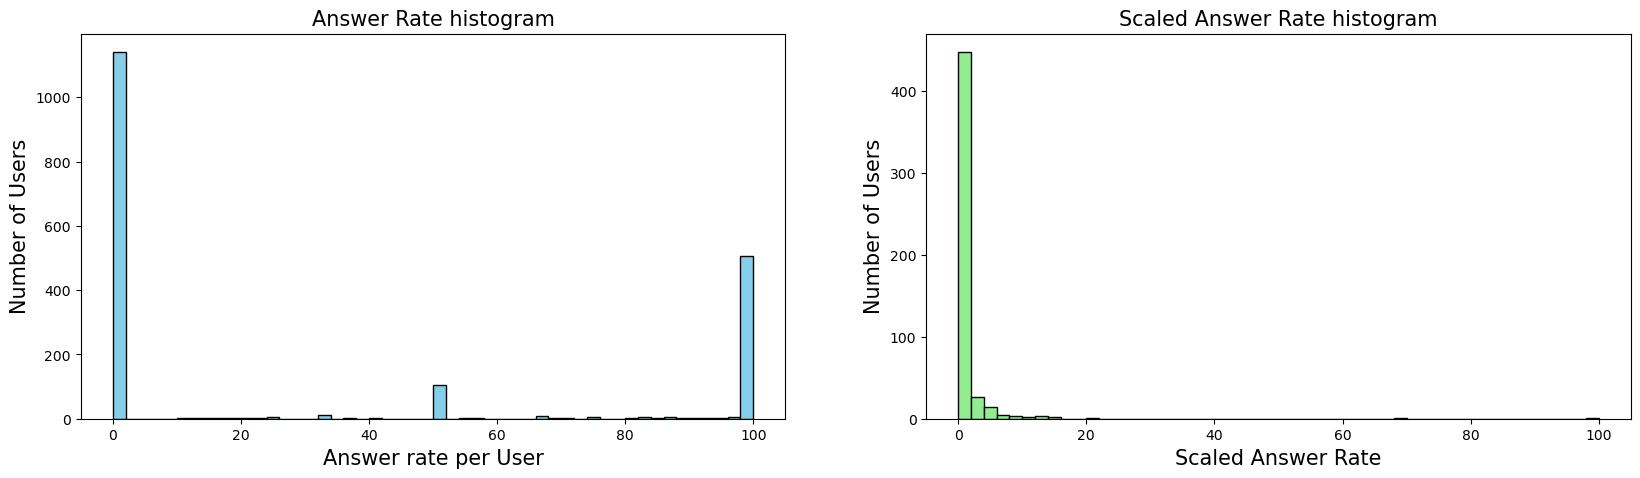

In [68]:
### create a figure with multiple subplots

fig, axs = plt.subplots(1, 2, figsize = (20, 5))

axs[0].hist(q_and_a_pv['answer_rate'], # plot the original histogram
            bins = 50,
            color = 'skyblue',
            edgecolor = 'black')
axs[0].set_title('Answer Rate histogram', fontsize = 15)
axs[0].set_xlabel('Answer rate per User', fontsize = 15)
axs[0].set_ylabel('Number of Users', fontsize = 15)

axs[1].hist(q_and_a_pv.loc[q_and_a_pv['answer_rate']==100, 'answer_cnt_scaled_rate2'],
            bins = 50,
            color = 'lightgreen',
            edgecolor = 'black')
axs[1].set_title('Scaled Answer Rate histogram', fontsize = 15)
axs[1].set_xlabel('Scaled Answer Rate', fontsize = 15)
axs[1].set_ylabel('Number of Users', fontsize = 15)

plt.show();

In [69]:
q_and_a_pv.loc[q_and_a_pv['answer_rate']==100, 'tot_cnt'].value_counts(normalize=True)*100

1      68.712871
2      13.861386
3       4.554455
5       1.980198
6       1.584158
9       1.386139
4       1.386139
7       1.386139
12      0.792079
17      0.396040
13      0.396040
15      0.396040
24      0.396040
8       0.396040
10      0.396040
19      0.198020
26      0.198020
11      0.198020
41      0.198020
130     0.198020
30      0.198020
27      0.198020
23      0.198020
186     0.198020
21      0.198020
Name: tot_cnt, dtype: float64

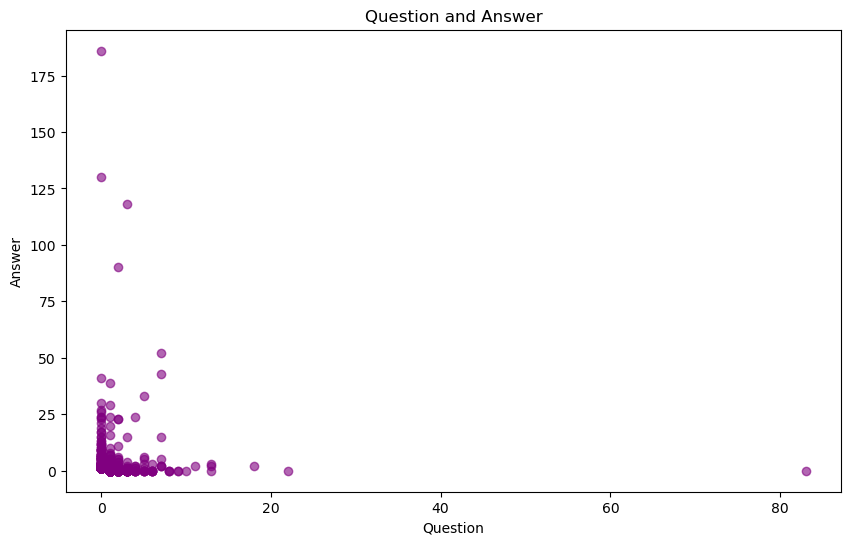

In [70]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))

ax.scatter(q_and_a_pv['question_cnt'], q_and_a_pv['answer_cnt'], color = 'purple', alpha = 0.6)

ax.set_title('Question and Answer')
ax.set_xlabel('Question')
ax.set_ylabel('Answer')


plt.show();

In [71]:
df = merge_df[[ 'OwnerUserId_question','OwnerUserId']]

In [72]:
# df = nx.to_pandas_edgelist(G)
df.rename(columns={'OwnerUserId_question':'Source', 'OwnerUserId':'Target'}, inplace=True)
df.to_csv('./directed_qna_gephi_1.csv', index=False)
# gephi 툴을 활용하여 시각화 진행 

In [73]:
node = np.unique(np.append(merge_df['OwnerUserId'].values, merge_df['OwnerUserId_question'].values))

In [74]:
# 질문자->답변자 로 edgelist 생성
edgelist = list(zip(merge_df['OwnerUserId_question'], merge_df['OwnerUserId']))

In [75]:
github = nx.DiGraph()
github.add_nodes_from(node)
github.add_edges_from(edgelist)

In [76]:
degree = nx.degree_centrality(github)
indegree = nx.in_degree_centrality(github)
outdegree = nx.out_degree_centrality(github)
betweenness = nx.betweenness_centrality(github)
closeness = nx.closeness_centrality(github)
eigenvector = nx.eigenvector_centrality(github)

nx.set_node_attributes(github, degree, 'degree')
nx.set_node_attributes(github, betweenness, 'betweenness')
nx.set_node_attributes(github, closeness, 'closeness')
nx.set_node_attributes(github, eigenvector, 'eigenvector')
nx.set_node_attributes(github, indegree, 'indegree')
nx.set_node_attributes(github, outdegree, 'outdegree')

In [77]:
df_github = pd.DataFrame.from_dict(dict(github.nodes(data=True)), orient='index')

In [78]:
df_github.head()

,degree,betweenness,closeness,eigenvector,indegree,outdegree
10051,0.000548,0.0,0.000548,3.475555e-32,0.000548,0.000000
10191,0.001095,0.0,0.000000,3.697399e-34,0.000000,0.001095
104,0.002191,0.0,0.000000,3.697399e-34,0.000000,0.002191
10592,0.000548,0.0,0.000548,3.475555e-32,0.000548,0.000000
10649,0.000548,0.0,0.000548,3.661727e-06,0.000548,0.000000


In [79]:
sorted_degree = df_github.sort_values(by='degree', ascending=False)
sorted_degree.head()

,degree,betweenness,closeness,eigenvector,indegree,outdegree
1847,0.074480,0.000000,0.101907,0.685711,0.074480,0.000000
34098,0.060241,0.000000,0.065773,0.000015,0.060241,0.000000
2444,0.048193,0.000058,0.072961,0.725610,0.047097,0.001095
69468,0.043264,0.000043,0.049417,0.040475,0.042169,0.001095
34383,0.031216,0.000202,0.025980,0.001190,0.026287,0.004929


In [80]:
sorted_degree = df_github.sort_values(by='betweenness', ascending=False)
sorted_degree.head()

,degree,betweenness,closeness,eigenvector,indegree,outdegree
62466,0.025192,0.000213,0.022813,2.819674e-29,0.020811,0.004381
34383,0.031216,0.000202,0.025980,1.190061e-03,0.026287,0.004929
24014,0.014786,0.000120,0.025964,1.179076e-03,0.013143,0.001643
12201,0.013691,0.000092,0.027930,5.291196e-04,0.012048,0.001643
51975,0.010405,0.000065,0.019993,5.027551e-03,0.008215,0.002191


In [81]:
sorted_degree = df_github.sort_values(by='closeness', ascending=False)
sorted_degree.head()

,degree,betweenness,closeness,eigenvector,indegree,outdegree
1847,0.074480,0.000000,0.101907,0.685711,0.074480,0.000000
2444,0.048193,0.000058,0.072961,0.725610,0.047097,0.001095
34098,0.060241,0.000000,0.065773,0.000015,0.060241,0.000000
69468,0.043264,0.000043,0.049417,0.040475,0.042169,0.001095
63505,0.010953,0.000000,0.035642,0.001157,0.010953,0.000000


In [82]:
sorted_degree = df_github.sort_values(by='eigenvector', ascending=False)
sorted_degree.head()

,degree,betweenness,closeness,eigenvector,indegree,outdegree
2444,0.048193,0.000058,0.072961,0.725610,0.047097,0.001095
1847,0.074480,0.000000,0.101907,0.685711,0.074480,0.000000
69468,0.043264,0.000043,0.049417,0.040475,0.042169,0.001095
4,0.006024,0.000000,0.019032,0.039204,0.005476,0.000548
51975,0.010405,0.000065,0.019993,0.005028,0.008215,0.002191


In [83]:
all_com = list(combinations(list(sorted_degree.columns), 2))
df_list = []
for col_x, col_y in all_com :
    df_row = []
    df_row.append(col_x)
    df_row.append(col_y)
    df_row.append(np.corrcoef(sorted_degree[col_x], sorted_degree[col_y])[0][1])
    df_list.append(df_row)

df_corr = pd.DataFrame(df_list, columns =['col_x', 'col_y', 'correlation'])

In [84]:
col_list = ['indegree', 'outdegree']
row_list = ['degree', 'closeness', 'eigenvector', 'betweenness']


In [85]:
df_corr['col_set'] = [set(list(x)) for x in list(zip(df_corr['col_x'], df_corr['col_y']))]

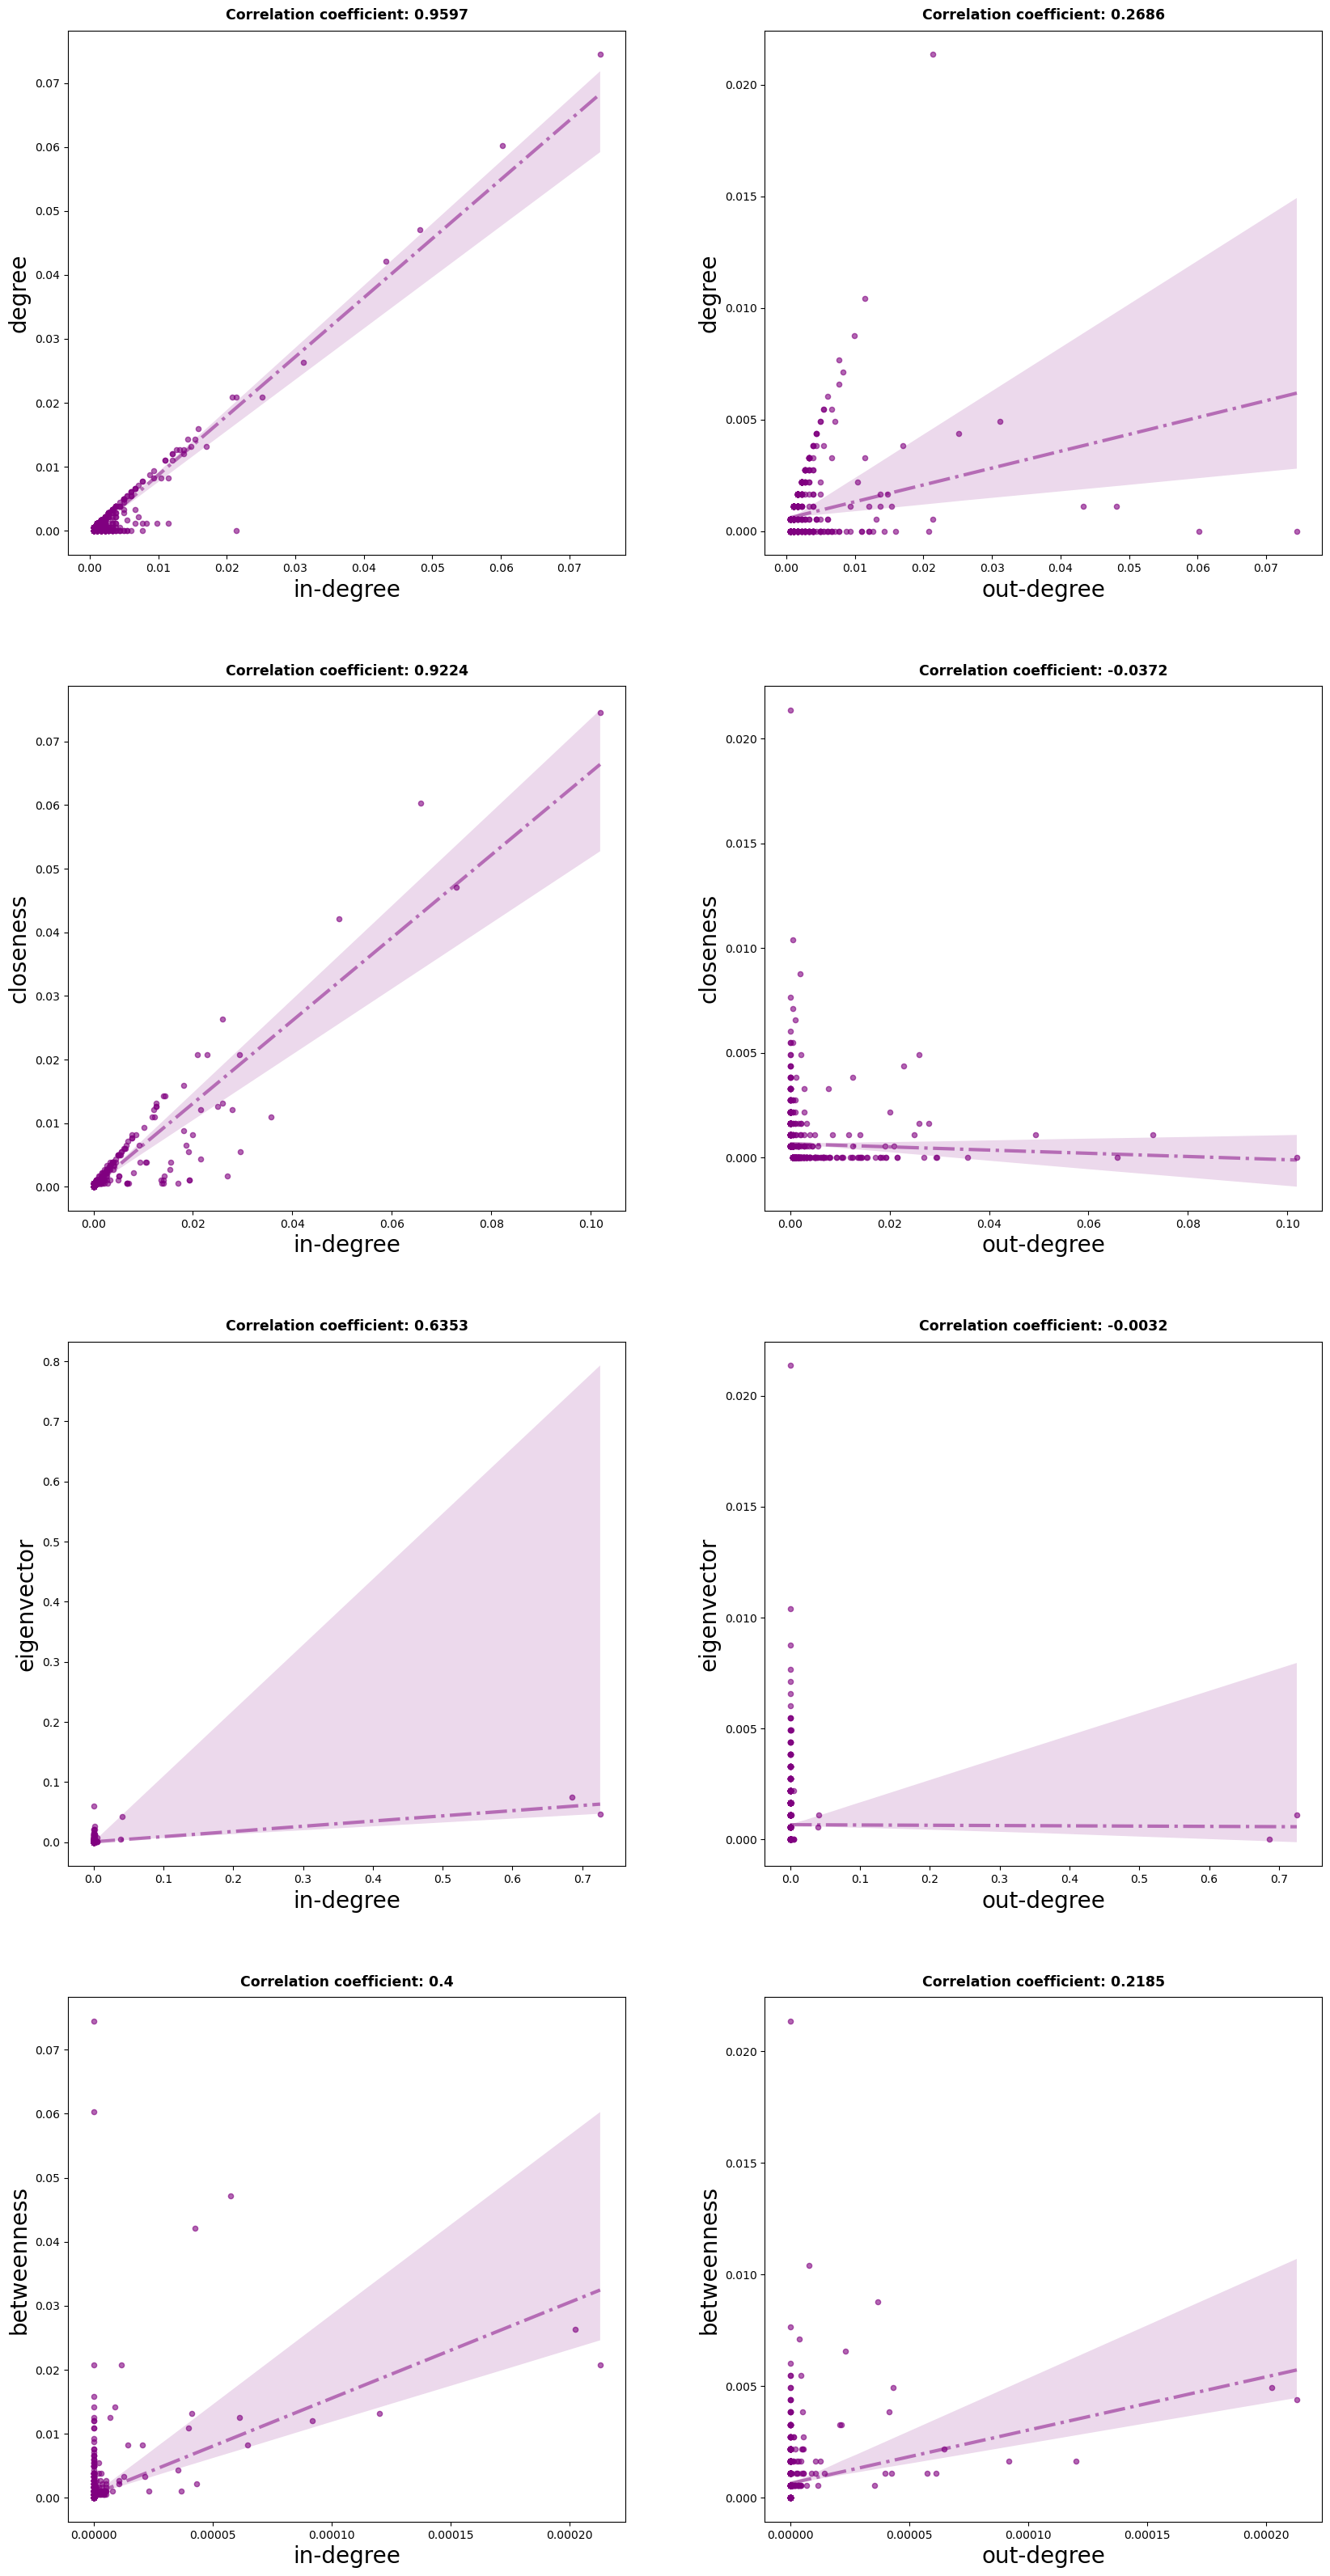

In [86]:
fig, axs = plt.subplots(4, 2, figsize = (20, 40))

for i in range(0, 4):
    for j in range(0, 2) : 
        sns.regplot(x = sorted_degree[row_list[i]] , y = sorted_degree[col_list[j]] , color = 'purple', 
                    scatter_kws = {'s': 20, 'alpha': 0.6},
                    line_kws = {'lw' : 3, 'ls' : '-.','alpha' : 0.5},
                    ax = axs[i][j])

        cc = df_corr.loc[df_corr['col_set']== set([row_list[i],col_list[j]]), 'correlation'].values[0]

        axs[i][j].set_title('Correlation coefficient: ' + str(np.round(cc, 4)), # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
        axs[i][j].set_ylabel(row_list[i], fontsize = 20.0) # add title
        axs[i][j].set_xlabel(col_list[j].replace('degree', '')+'-degree', fontsize = 20.0) # add title
        

fig.subplots_adjust(wspace = 0.25, hspace = 0.25)
plt.show();

In [87]:
df_github[ 'eigenvector_round'] = np.round(df_github[ 'eigenvector'], 6)

In [88]:
df_github.sort_values(by = [ 'eigenvector_round'], ascending=False)

,degree,betweenness,closeness,eigenvector,indegree,outdegree,eigenvector_round
2444,0.048193,0.000058,0.072961,7.256097e-01,0.047097,0.001095,0.725610
1847,0.074480,0.000000,0.101907,6.857115e-01,0.074480,0.000000,0.685711
69468,0.043264,0.000043,0.049417,4.047490e-02,0.042169,0.001095,0.040475
4,0.006024,0.000000,0.019032,3.920428e-02,0.005476,0.000548,0.039204
51975,0.010405,0.000065,0.019993,5.027551e-03,0.008215,0.002191,0.005028
...,...,...,...,...,...,...,...
51928,0.001095,0.000000,0.000000,3.697399e-34,0.000000,0.001095,0.000000
51914,0.000548,0.000000,0.000548,3.475555e-32,0.000548,0.000000,0.000000
51888,0.000548,0.000000,0.000548,3.475555e-32,0.000548,0.000000,0.000000
51884,0.000548,0.000000,0.000548,3.475555e-32,0.000548,0.000000,0.000000


In [89]:
eigenvector_round_not0 = df_github.loc[df_github['eigenvector_round']>0, 'eigenvector_round']
eigenvector_round_0 = df_github.loc[~(df_github['eigenvector_round']>0), 'eigenvector_round']

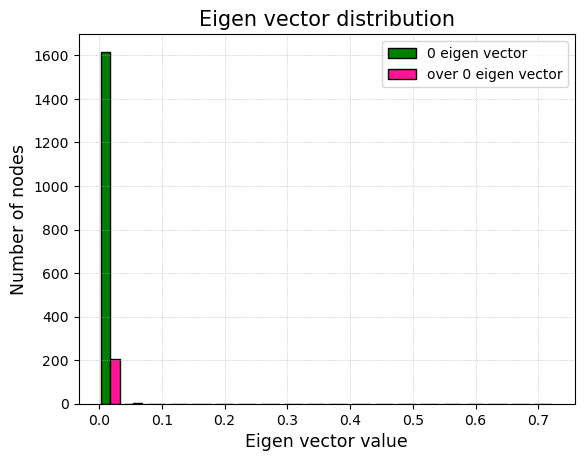

In [90]:
### two groups: default

fig, ax = plt.subplots()

ax.hist([eigenvector_round_0, eigenvector_round_not0], # specify data
        bins = 20, # number of bins
        color = ['green', 'deeppink'], # bar color
        edgecolor = 'black', # bar edge color
        histtype = 'bar', # type of histogram
        label = ['0 eigen vector', 'over 0 eigen vector']) # create legened labels

ax.set_title('Eigen vector distribution', fontsize = 15) # title
ax.set_xlabel('Eigen vector value', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of nodes', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10, ncols = 1) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [91]:
df_github.loc[df_github['eigenvector_round']>0.03, :]

,degree,betweenness,closeness,eigenvector,indegree,outdegree,eigenvector_round
1847,0.074480,0.000000,0.101907,0.685711,0.074480,0.000000,0.685711
2444,0.048193,0.000058,0.072961,0.725610,0.047097,0.001095,0.725610
4,0.006024,0.000000,0.019032,0.039204,0.005476,0.000548,0.039204
69468,0.043264,0.000043,0.049417,0.040475,0.042169,0.001095,0.040475


In [92]:
q_and_a_pv[q_and_a_pv['UserId'].isin(['2444','69468', '1847'])]
# 

,UserId,answer_cnt,question_cnt,tot_cnt,answer_rate,answer_cnt_scaled,question_cnt_scaled,tot_cnt_scaled,answer_cnt_scaled_rate,answer_cnt_scaled_rate1,answer_cnt_scaled_rate2
62,1847,186,0,186,100.00,1.000000,0.000000,1.000000,100.000000,0.023121,100.000000
109,2444,118,3,121,97.52,0.634409,0.036145,0.648649,61.867946,0.023709,63.256216
1504,69468,90,2,92,97.83,0.483871,0.024096,0.491892,47.335203,0.023635,48.121784
